# Problem Statement:
    
    The main goal of this project is to perform extensive Exploratory Data Analysis(EDA) on
    the Zomato Dataset and build an appropriate Machine Learning Model that will help
    various Zomato Restaurants to predict their respective Ratings based on certain
    features.

# Approach: 

    The classical machine learning tasks like Data Exploration, Data Cleaning,
    Feature Engineering, Model Building and Model Testing. Try out different machine
    learning algorithms that’s best fit for the above case.

# STEP 1 : Import Libraries and Dataset

In [69]:
import pandas as pd
import numpy as np

In [70]:
import seaborn as sns

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
#import pyspark
#import datawig
from scipy.stats import skew

In [72]:
df = pd.read_csv(r"C:\Users\admin\Desktop\Machine Learning\zomato.csv")
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [74]:
df.shape

(51717, 17)

In [75]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


# STEP 2 : DATA PRE-PROCESSING

In [76]:
df= df.drop(['url','address','phone'],axis = 1)

In [77]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [78]:
df.online_order[df.online_order == 'Yes'] = 1 
df.online_order[df.online_order == 'No'] = 0

df.book_table[df.book_table == 'Yes'] = 1 
df.book_table[df.book_table == 'No'] = 0

df.online_order = pd.to_numeric(df.online_order)
df.book_table = pd.to_numeric(df.book_table)

C:\Users\admin\AppData\Local\Temp\ipykernel_7280\1952270314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.online_order[df.online_order == 'Yes'] = 1
C:\Users\admin\AppData\Local\Temp\ipykernel_7280\1952270314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.online_order[df.online_order == 'No'] = 0
C:\Users\admin\AppData\Local\Temp\ipykernel_7280\1952270314.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.book_tabl

In [79]:
df4 = df['rate']
df['rate'] = df4.dropna().apply(lambda x: float(x.split('/')[0]) if (len(x)>3) else np.nan).dropna()
df

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.6,27,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,0,0,NaN,0,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,0,0,NaN,0,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.3,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [80]:
df.describe()

,online_order,book_table,rate,votes
count,51717.000000,51717.000000,41665.000000,51717.000000
mean,0.588665,0.124698,3.700449,283.697527
std,0.492080,0.330379,0.440513,803.838853
min,0.000000,0.000000,1.800000,0.000000
25%,0.000000,0.000000,3.400000,7.000000
50%,1.000000,0.000000,3.700000,41.000000
75%,1.000000,0.000000,4.000000,198.000000
max,1.000000,1.000000,4.900000,16832.000000


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  object 
 1   online_order                 51717 non-null  int64  
 2   book_table                   51717 non-null  int64  
 3   rate                         41665 non-null  float64
 4   votes                        51717 non-null  int64  
 5   location                     51696 non-null  object 
 6   rest_type                    51490 non-null  object 
 7   dish_liked                   23639 non-null  object 
 8   cuisines                     51672 non-null  object 
 9   approx_cost(for two people)  51371 non-null  object 
 10  reviews_list                 51717 non-null  object 
 11  menu_item                    51717 non-null  object 
 12  listed_in(type)              51717 non-null  object 
 13  listed_in(city) 

In [82]:
def comma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',','')
        return float(value)
    else:
        return float(value)
df['costfor2'] = df['approx_cost(for two people)'].apply(comma)
del df['approx_cost(for two people)']

In [83]:
df.columns


Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'costfor2'],
      dtype='object')

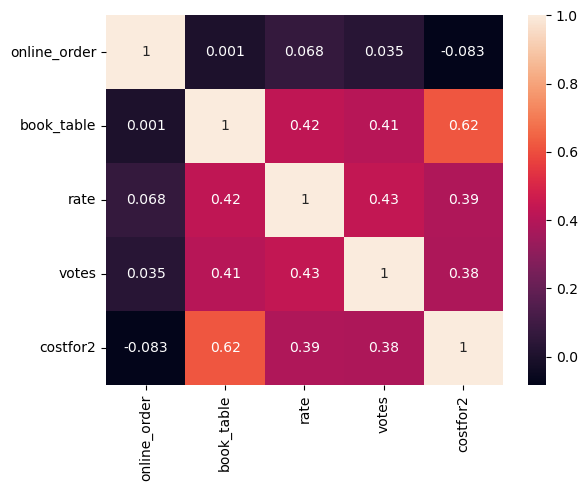

In [84]:
sns.heatmap(df.corr(),annot=True)
plt.show()

# STEP 3 : EXPLORATORY DATA ANALYSIS

Text(0, 0.5, 'Density')

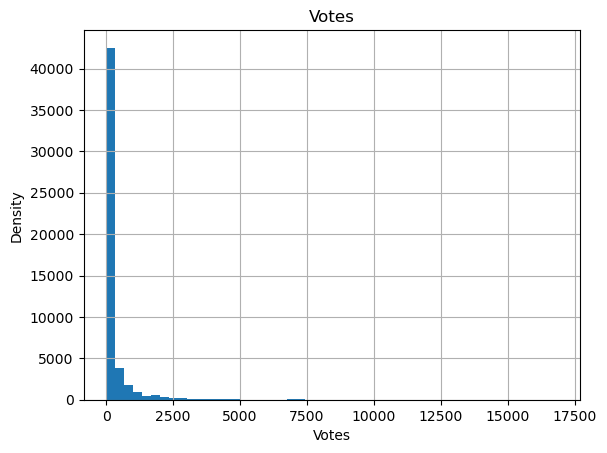

In [85]:
fig=df.votes.hist(bins=50)
fig.set_title('Votes')
fig.set_xlabel('Votes')
fig.set_ylabel('Density')

Text(0, 0.5, 'Density')

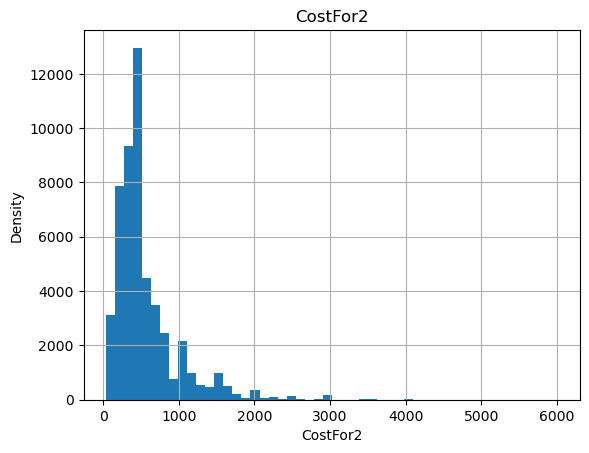

In [86]:
fig=df.costfor2.hist(bins=50)
fig.set_title('CostFor2')
fig.set_xlabel('CostFor2')
fig.set_ylabel('Density')

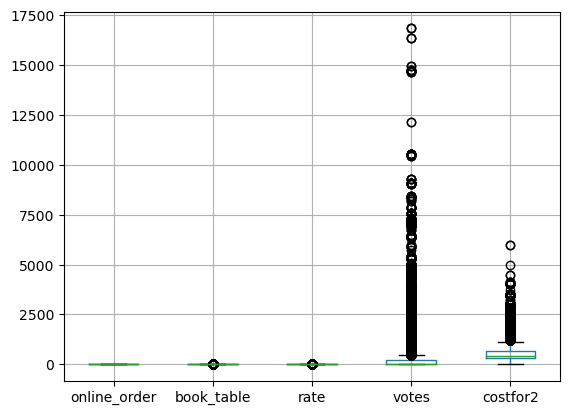

In [87]:
fig=df.boxplot()

In [88]:
df['votes']=np.sqrt(df['votes'])

In [89]:
df['costfor2']=np.sqrt(df['costfor2'])

In [90]:
df

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,reviews_list,menu_item,listed_in(type),listed_in(city),costfor2
0,Jalsa,1,1,4.1,27.838822,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese","[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,28.284271
1,Spice Elephant,1,0,4.1,28.053520,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai","[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,28.284271
2,San Churro Cafe,1,0,3.8,30.298515,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian","[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,28.284271
3,Addhuri Udupi Bhojana,0,0,3.7,9.380832,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian","[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,17.320508
4,Grand Village,0,0,3.8,12.884099,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani","[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,24.494897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.6,5.196152,Whitefield,Bar,NaN,Continental,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield,38.729833
51713,Vinod Bar And Restaurant,0,0,NaN,0.000000,Whitefield,Bar,NaN,Finger Food,[],[],Pubs and bars,Whitefield,24.494897
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,0,0,NaN,0.000000,Whitefield,Bar,NaN,Finger Food,[],[],Pubs and bars,Whitefield,44.721360
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.3,15.362291,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield,50.000000


Text(0, 0.5, 'Density')

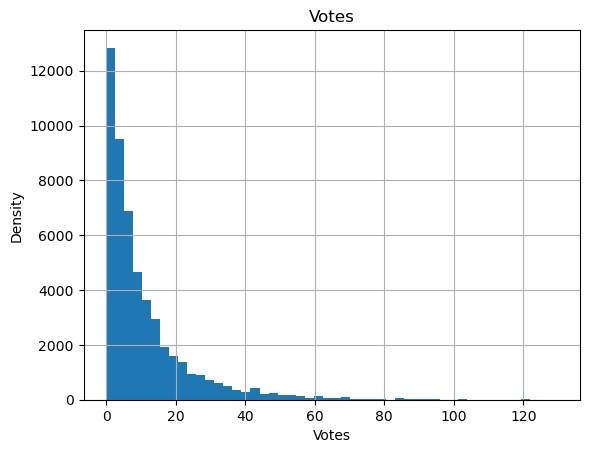

In [91]:
fig=df.votes.hist(bins=50)
fig.set_title('Votes')
fig.set_xlabel('Votes')
fig.set_ylabel('Density')

In [92]:
df = df.rename(columns={'approx_cost(for two people)':'costfor2','listed_in(type)':'type','listed_in(city)':'city'})

In [93]:
df

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,reviews_list,menu_item,type,city,costfor2
0,Jalsa,1,1,4.1,27.838822,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese","[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,28.284271
1,Spice Elephant,1,0,4.1,28.053520,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai","[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,28.284271
2,San Churro Cafe,1,0,3.8,30.298515,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian","[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,28.284271
3,Addhuri Udupi Bhojana,0,0,3.7,9.380832,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian","[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,17.320508
4,Grand Village,0,0,3.8,12.884099,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani","[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,24.494897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.6,5.196152,Whitefield,Bar,NaN,Continental,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield,38.729833
51713,Vinod Bar And Restaurant,0,0,NaN,0.000000,Whitefield,Bar,NaN,Finger Food,[],[],Pubs and bars,Whitefield,24.494897
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,0,0,NaN,0.000000,Whitefield,Bar,NaN,Finger Food,[],[],Pubs and bars,Whitefield,44.721360
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.3,15.362291,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield,50.000000


In [94]:
df.duplicated().sum()

63

In [95]:
df.drop_duplicates(inplace=True)

In [96]:
df.duplicated().sum()

0

In [97]:
df.isnull().sum()

name                0
online_order        0
book_table          0
rate            10027
votes               0
location           21
rest_type         227
dish_liked      28027
cuisines           45
reviews_list        0
menu_item           0
type                0
city                0
costfor2          345
dtype: int64

In [98]:
df['rate'].fillna(df['rate'].median(),inplace=True)

In [99]:
df

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,reviews_list,menu_item,type,city,costfor2
0,Jalsa,1,1,4.1,27.838822,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese","[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,28.284271
1,Spice Elephant,1,0,4.1,28.053520,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai","[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,28.284271
2,San Churro Cafe,1,0,3.8,30.298515,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian","[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,28.284271
3,Addhuri Udupi Bhojana,0,0,3.7,9.380832,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian","[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,17.320508
4,Grand Village,0,0,3.8,12.884099,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani","[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,24.494897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.6,5.196152,Whitefield,Bar,NaN,Continental,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield,38.729833
51713,Vinod Bar And Restaurant,0,0,3.7,0.000000,Whitefield,Bar,NaN,Finger Food,[],[],Pubs and bars,Whitefield,24.494897
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,0,0,3.7,0.000000,Whitefield,Bar,NaN,Finger Food,[],[],Pubs and bars,Whitefield,44.721360
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.3,15.362291,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield,50.000000


In [100]:
df.isna().sum()

name                0
online_order        0
book_table          0
rate                0
votes               0
location           21
rest_type         227
dish_liked      28027
cuisines           45
reviews_list        0
menu_item           0
type                0
city                0
costfor2          345
dtype: int64

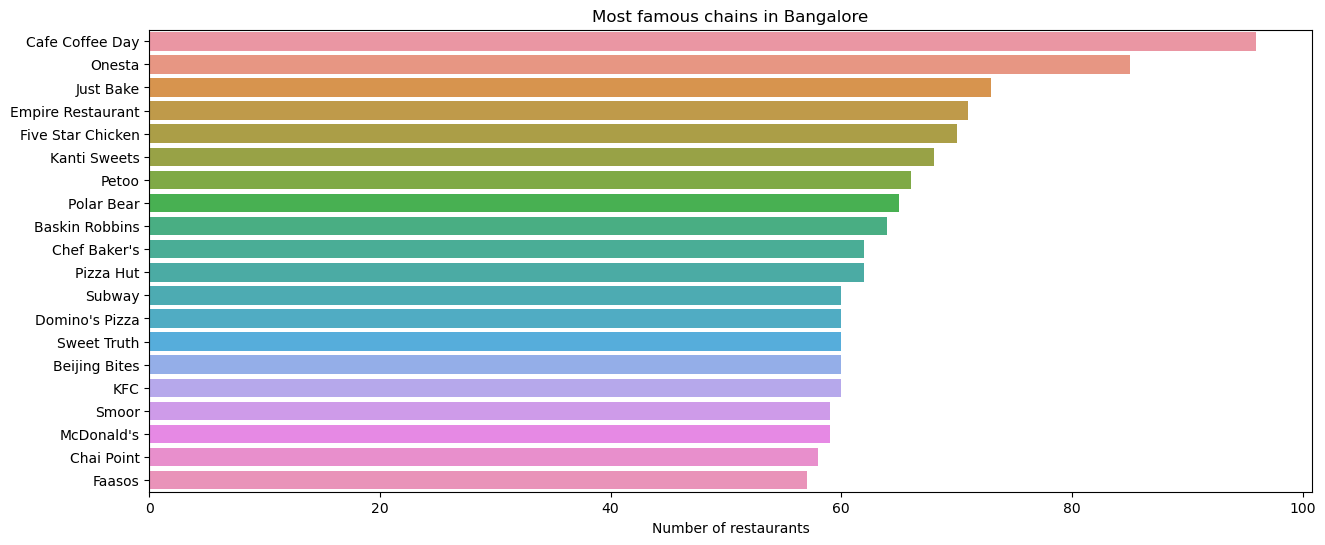

In [101]:
plt.figure(figsize=(15, 6))
df1 = df['name'].value_counts()[:20]
sns.barplot(y=df1.index, x=df1.values)
plt.title('Most famous chains in Bangalore')
plt.xlabel('Number of restaurants')
plt.show()

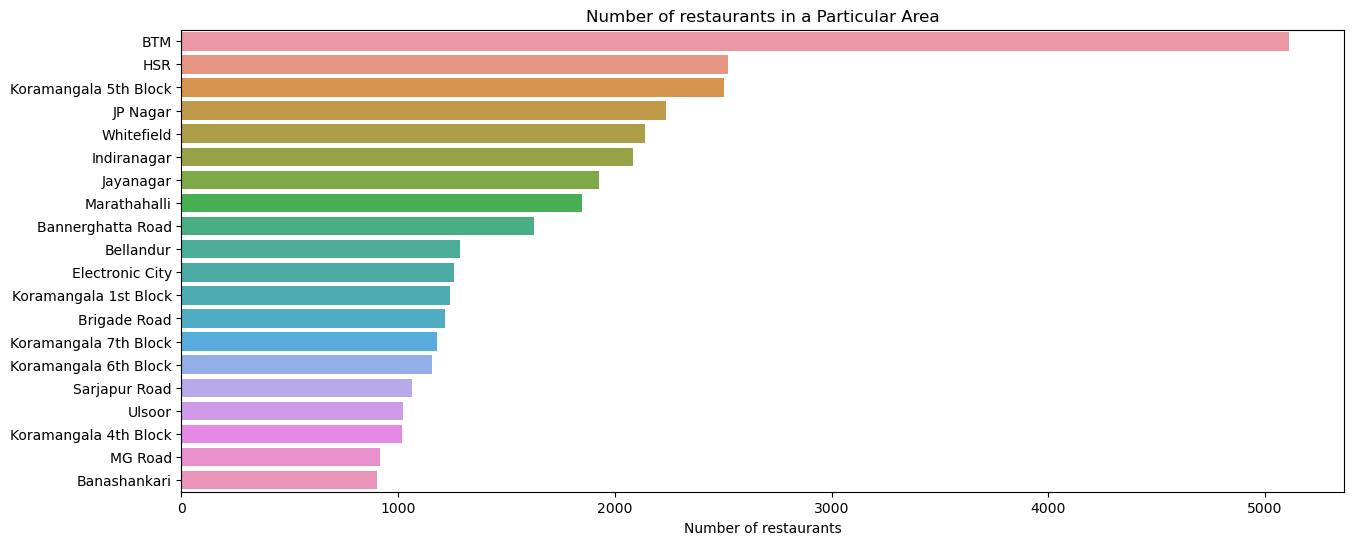

In [102]:
plt.figure(figsize=(15, 6))
df1 = df['location'].value_counts()[:20]
sns.barplot(y=df1.index, x=df1.values)
plt.title('Number of restaurants in a Particular Area')
plt.xlabel('Number of restaurants')
plt.show()

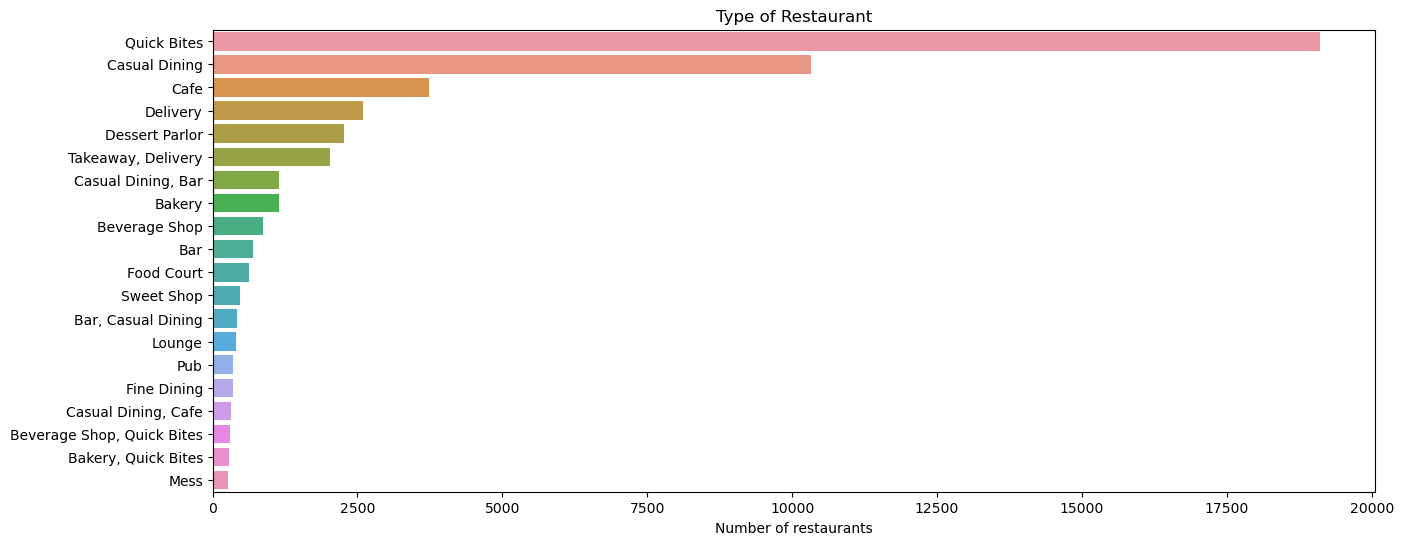

In [103]:
plt.figure(figsize=(15, 6))
df1 = df['rest_type'].value_counts()[:20]
sns.barplot(y=df1.index, x=df1.values)
plt.title('Type of Restaurant')
plt.xlabel('Number of restaurants')
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Restaurants taking online orders')

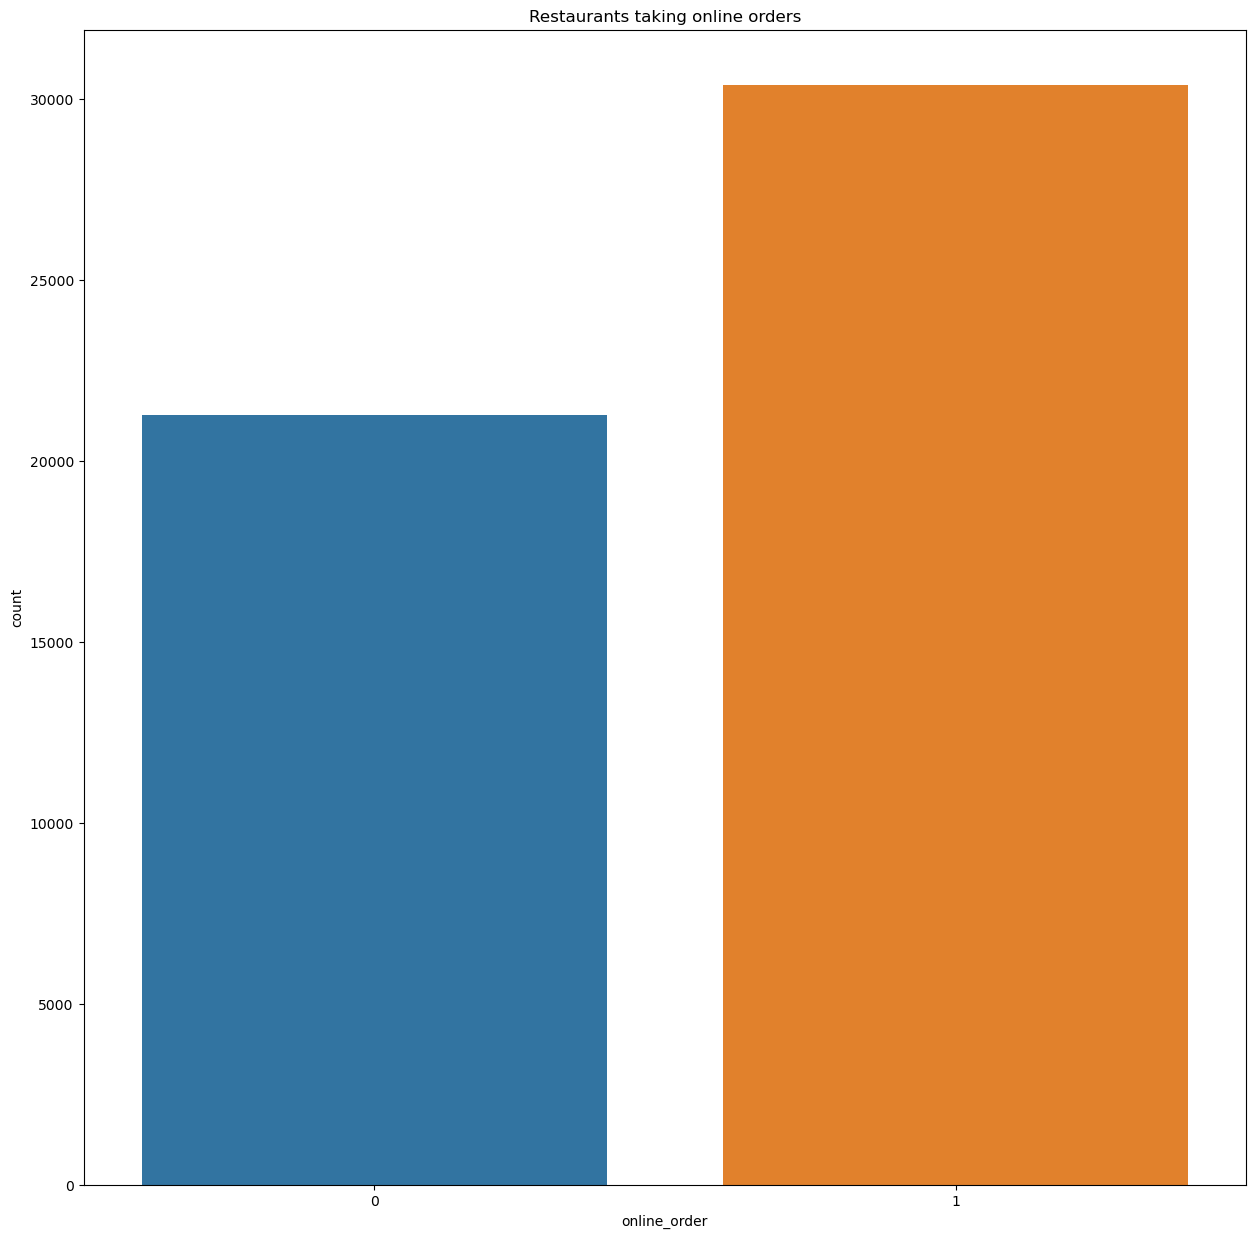

In [104]:
plt.figure(figsize=(15,15))
sns.countplot(df['online_order'])
plt.title('Restaurants taking online orders')


* 0 = No
* 1 = Yes

In [105]:
df['online_order'].value_counts()

1    30395
0    21259
Name: online_order, dtype: int64

In [106]:
df['book_table'].value_counts()

0    45215
1     6439
Name: book_table, dtype: int64

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Table Booking From Zomato')

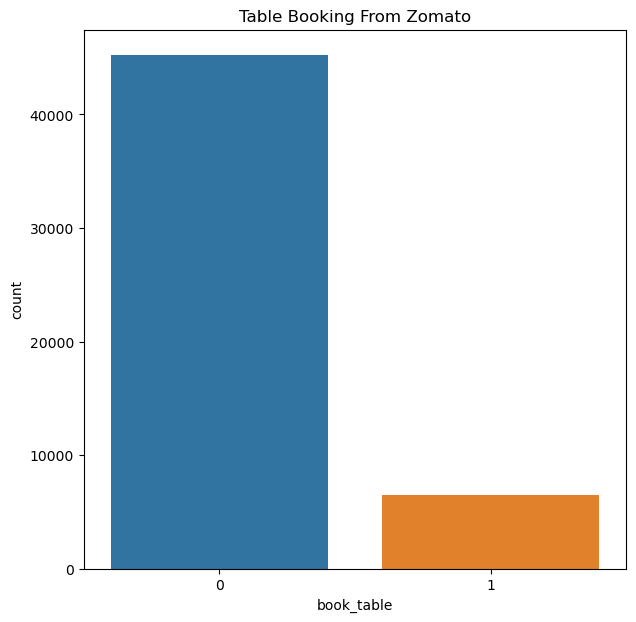

In [107]:
plt.figure(figsize=(7,7))
sns.countplot(df['book_table'])
plt.title('Table Booking From Zomato')


In [108]:
df.drop(['menu_item','dish_liked'],axis=1)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,reviews_list,type,city,costfor2
0,Jalsa,1,1,4.1,27.838822,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese","[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,28.284271
1,Spice Elephant,1,0,4.1,28.053520,Banashankari,Casual Dining,"Chinese, North Indian, Thai","[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,28.284271
2,San Churro Cafe,1,0,3.8,30.298515,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian","[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,28.284271
3,Addhuri Udupi Bhojana,0,0,3.7,9.380832,Banashankari,Quick Bites,"South Indian, North Indian","[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,17.320508
4,Grand Village,0,0,3.8,12.884099,Basavanagudi,Casual Dining,"North Indian, Rajasthani","[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,24.494897
...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,0,0,3.6,5.196152,Whitefield,Bar,Continental,"[('Rated 5.0', ""RATED\n Food and service are ...",Pubs and bars,Whitefield,38.729833
51713,Vinod Bar And Restaurant,0,0,3.7,0.000000,Whitefield,Bar,Finger Food,[],Pubs and bars,Whitefield,24.494897
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,0,0,3.7,0.000000,Whitefield,Bar,Finger Food,[],Pubs and bars,Whitefield,44.721360
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,0,1,4.3,15.362291,"ITPL Main Road, Whitefield",Bar,Finger Food,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",Pubs and bars,Whitefield,50.000000


In [109]:
df.dropna(inplace=True)

In [110]:
df.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
dish_liked      0
cuisines        0
reviews_list    0
menu_item       0
type            0
city            0
costfor2        0
dtype: int64

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23424 entries, 0 to 51715
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          23424 non-null  object 
 1   online_order  23424 non-null  int64  
 2   book_table    23424 non-null  int64  
 3   rate          23424 non-null  float64
 4   votes         23424 non-null  float64
 5   location      23424 non-null  object 
 6   rest_type     23424 non-null  object 
 7   dish_liked    23424 non-null  object 
 8   cuisines      23424 non-null  object 
 9   reviews_list  23424 non-null  object 
 10  menu_item     23424 non-null  object 
 11  type          23424 non-null  object 
 12  city          23424 non-null  object 
 13  costfor2      23424 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 2.7+ MB


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='costfor2', ylabel='Density'>

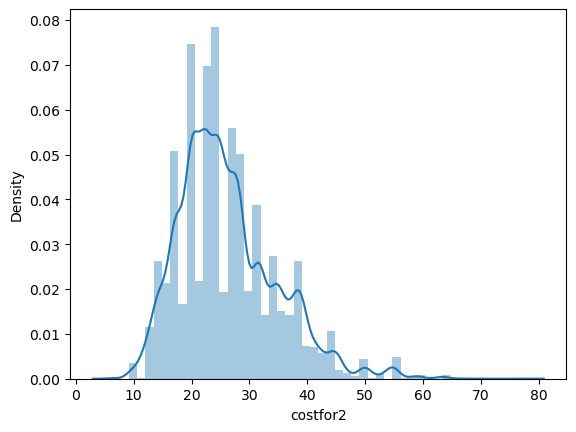

In [112]:
sns.distplot(df['costfor2'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='votes', ylabel='Density'>

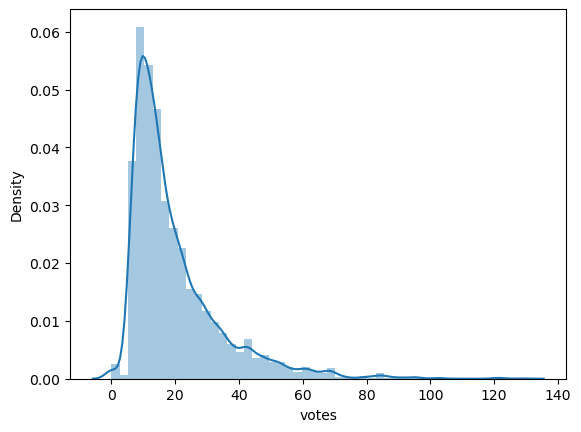

In [113]:
sns.distplot(df['votes'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rate', ylabel='Density'>

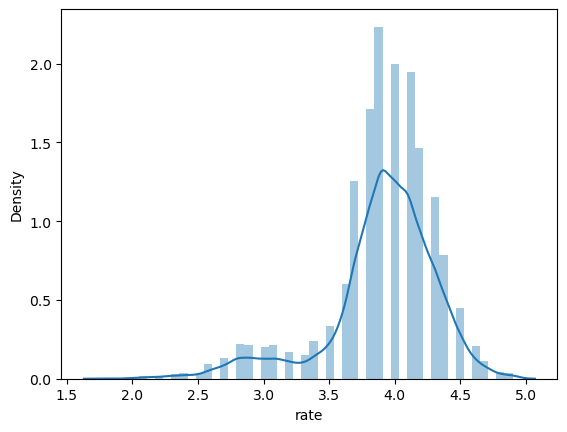

In [114]:
sns.distplot(df['rate'])

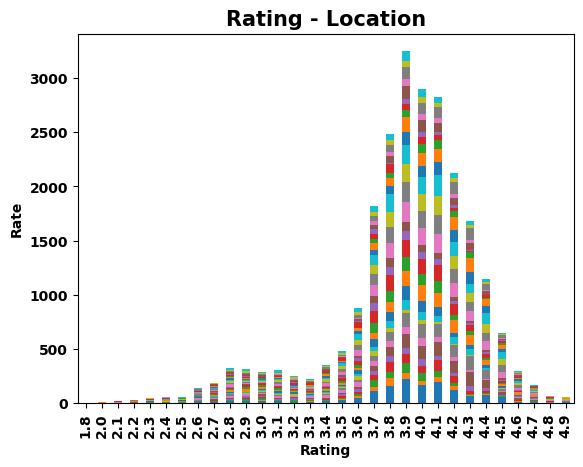

In [115]:
#Location and Rating
loc_plt=pd.crosstab(df['rate'],df['city'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Rating - Location',fontsize=15,fontweight='bold')
plt.ylabel('Rate',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

In [116]:
df = df.drop(['menu_item'],axis=1)

In [117]:
df

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,reviews_list,type,city,costfor2
0,Jalsa,1,1,4.1,27.838822,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese","[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,28.284271
1,Spice Elephant,1,0,4.1,28.053520,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai","[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,28.284271
2,San Churro Cafe,1,0,3.8,30.298515,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian","[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,28.284271
3,Addhuri Udupi Bhojana,0,0,3.7,9.380832,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian","[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,17.320508
4,Grand Village,0,0,3.8,12.884099,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani","[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,24.494897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51705,Izakaya Gastro Pub,1,1,3.8,11.313708,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean","[('Rated 3.0', ""RATED\n Nice place to hangout...",Pubs and bars,Whitefield,34.641016
51707,M Bar - Bengaluru Marriott Hotel Whitefield,0,0,3.9,8.774964,Whitefield,"Fine Dining, Bar",Rooftop Ambience,Finger Food,"[('Rated 4.0', 'RATED\n Went there post dinne...",Pubs and bars,Whitefield,44.721360
51708,Keys Cafe - Keys Hotel,0,0,2.8,12.688578,Whitefield,"Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","[('Rated 3.0', 'RATED\n Place is good not tha...",Pubs and bars,Whitefield,34.641016
51711,Bhagini,0,0,2.5,9.000000,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian","[('Rated 4.0', 'RATED\n A fine place to chill...",Pubs and bars,Whitefield,28.284271


In [118]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [119]:
df.location = le.fit_transform(df.location)
df.rest_type = le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cuisines)
df.dish_liked = le.fit_transform(df.dish_liked)
df.type = le.fit_transform(df.type)
df.city = le.fit_transform(df.city)

In [120]:
df = df.drop(['reviews_list'],axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,type,city,costfor2
0,Jalsa,1,1,4.1,27.838822,1,20,3628,1393,0,1,28.284271
1,Spice Elephant,1,0,4.1,28.053520,1,20,2950,596,0,1,28.284271
2,San Churro Cafe,1,0,3.8,30.298515,1,16,1409,485,0,1,28.284271
3,Addhuri Udupi Bhojana,0,0,3.7,9.380832,1,62,2752,1597,0,1,17.320508
4,Grand Village,0,0,3.8,12.884099,4,20,3435,1414,0,1,24.494897


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23424 entries, 0 to 51715
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          23424 non-null  object 
 1   online_order  23424 non-null  int64  
 2   book_table    23424 non-null  int64  
 3   rate          23424 non-null  float64
 4   votes         23424 non-null  float64
 5   location      23424 non-null  int32  
 6   rest_type     23424 non-null  int32  
 7   dish_liked    23424 non-null  int32  
 8   cuisines      23424 non-null  int32  
 9   type          23424 non-null  int32  
 10  city          23424 non-null  int32  
 11  costfor2      23424 non-null  float64
dtypes: float64(3), int32(6), int64(2), object(1)
memory usage: 1.8+ MB


In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.model_selection import train_test_split

In [123]:
x = df.iloc[:,[1,2,4,5,6,7,8,9,11]]
x.head()

,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,type,costfor2
0,1,1,27.838822,1,20,3628,1393,0,28.284271
1,1,0,28.053520,1,20,2950,596,0,28.284271
2,1,0,30.298515,1,16,1409,485,0,28.284271
3,0,0,9.380832,1,62,2752,1597,0,17.320508
4,0,0,12.884099,4,20,3435,1414,0,24.494897


In [124]:
y = df['rate']
y.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

# STEP 4 : DATA PARTITION

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1220)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16396 entries, 30899 to 20043
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  16396 non-null  int64  
 1   book_table    16396 non-null  int64  
 2   votes         16396 non-null  float64
 3   location      16396 non-null  int32  
 4   rest_type     16396 non-null  int32  
 5   dish_liked    16396 non-null  int32  
 6   cuisines      16396 non-null  int32  
 7   type          16396 non-null  int32  
 8   costfor2      16396 non-null  float64
dtypes: float64(2), int32(5), int64(2)
memory usage: 960.7 KB


In [126]:
x_train.columns

Index(['online_order', 'book_table', 'votes', 'location', 'rest_type',
       'dish_liked', 'cuisines', 'type', 'costfor2'],
      dtype='object')

# STEP 5 : MODEL BUILDING

## 5.1 LINEAR REGRESSION

In [127]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [128]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_predict=lr_model.predict(x_train)
r2_score(y_train,y_predict)

0.25886903095654334

In [129]:
import statsmodels.formula.api as smf
model = smf.ols('rate ~ online_order + book_table+votes+location+rest_type+dish_liked+cuisines+type+city+costfor2', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     828.6
Date:                Mon, 06 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:18:49   Log-Likelihood:                -9640.7
No. Observations:               23424   AIC:                         1.930e+04
Df Residuals:                   23413   BIC:                         1.939e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.6291      0.015    238.277      0.000       3.599       3.659
online_order     0.0159      0.006      2.851      0.004       0.005       0.027
book_table       0.1650      0.007     23.037      0.000       0.151       0.179
votes            0.0110      0.000     59.329      0.000       0.011       0.011
location         0.0013      0.000     12.097      0.000       0.001       0.002
rest_type       -0.0005      0.000     -3.888      0.000      -0.001      -0.000
dish_liked    6.943e-06   1.58e-06      4.390      0.000    3.84e-06       1e-05
cuisines     -6.811e-05   5.22e-06    -13.038      0.000   -7.83e-05   -5.79e-05
type            -0.0055      0.002     -2.762      0.006      -0.009      -0.002
city            -0.0004      0.000     -1.306      0.192      -0.001       0.000
costfor2         0.0013      0.000      3.251      0.001       0.001       0.002
==============================================================================
Omnibus:                     6570.332   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19111.114
Skew:                          -1.472   Prob(JB):                         0.00
Kurtosis:                       6.304   Cond. No.                     2.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 5.2 RANDOM FOREST REGRESSOR

In [130]:
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
RF_Model.fit(x_train,y_train)
y_predict=RF_Model.predict(x_test)
r2_score(y_test,y_predict)

0.8886537093570803

In [131]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.06633849935837988
Mean Squared Error: 0.01975391093339014
Root Mean Squared Error: 0.1405486070133395


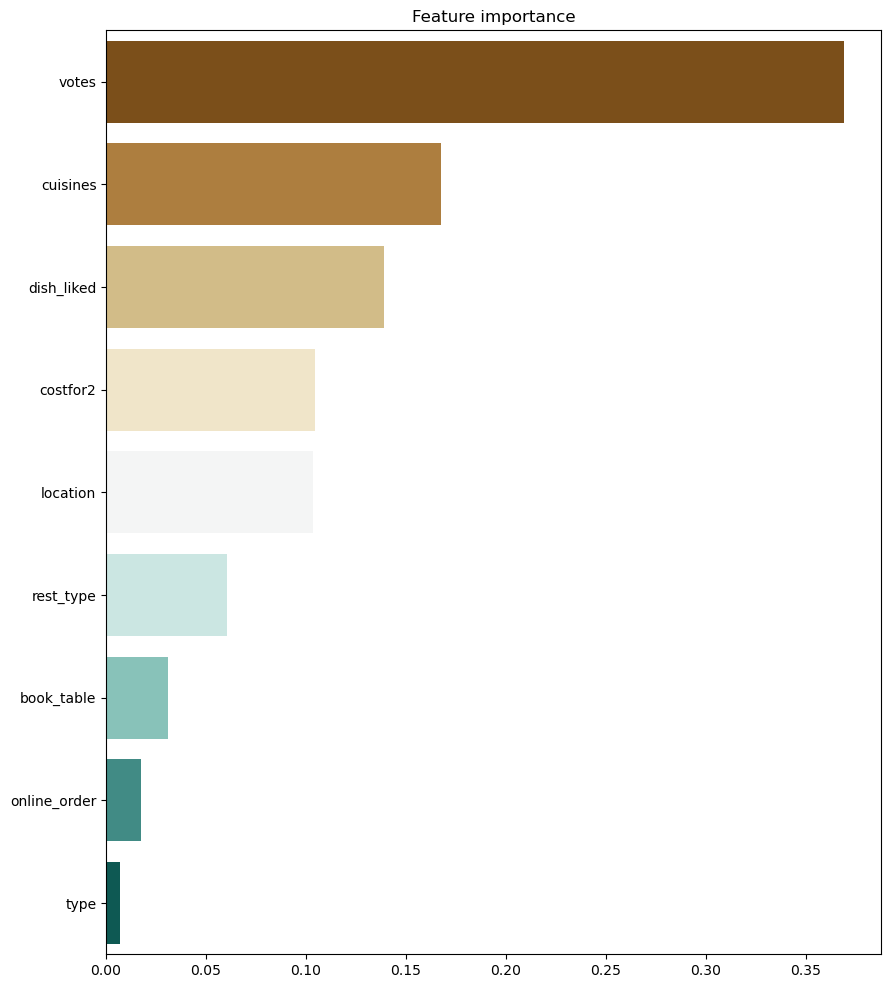

In [132]:
# Plot features importances
imp = pd.Series(data=RF_Model.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="BrBG", orient='h')

In [133]:
y_predict.shape

(7028,)

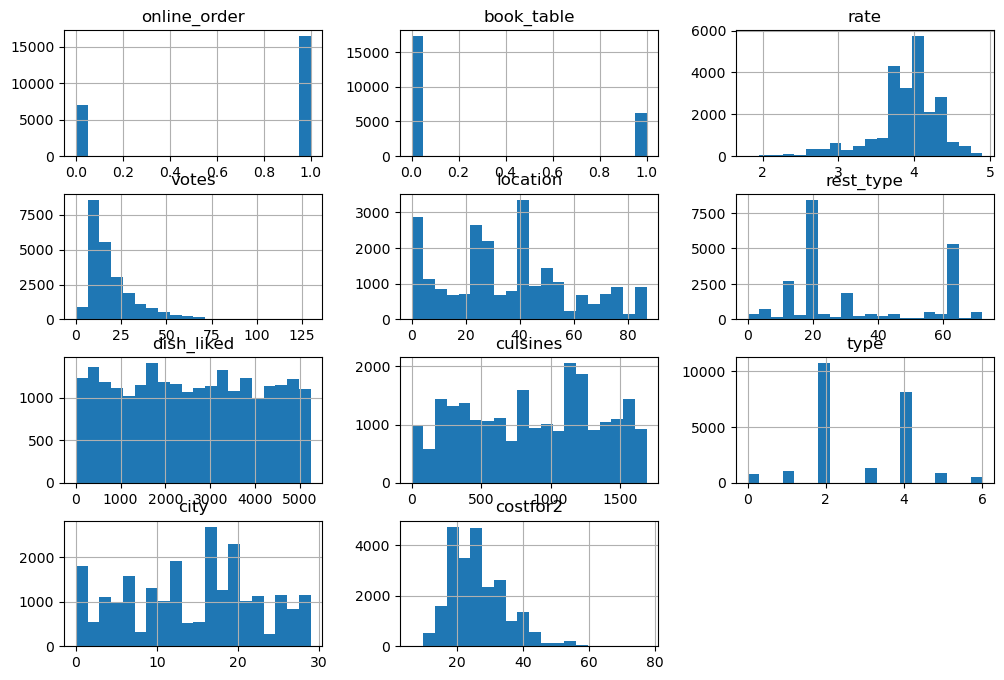

In [134]:
df.hist(figsize=(12,8),bins=20)
plt.show()

# STEP 6 : PICKLE MODEL

In [135]:
#Use pickle to save our model so that we can use it later

import pickle 
# Saving model to disk
pickle.dump(RF_Model, open('model.pkl','wb'))
# model=pickle.load(open('model.pkl','rb'))

# CONCLUSION

* We can conclude that we have done Data Pre-processing, EDA Analysis, Model Building on Dataset.
* and we found that "Random Forest Regressor" works better than "Linear Regression".
* In EDA we mentioned important "Business Insights" for Rating Prediction.
* Using this model we can predict Ratings of Restaurant in Bangalore.